In [3]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import torch # only to chekc if gpu acceleration is available


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [4]:
df = pd.read_csv(r"C:\Users\komar\Downloads\PRODIGY_ML_5-main\PRODIGY_ML_5-main\McDonaldsMenuNutritionV2.csv")
df


,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Hamburger,250,80.0,9.0,3.5,0.5,25,520,31,2,6,12,247.5
1,Cheeseburger,300,110.0,12.0,6,0.5,40,750,33,2,6,15,297.0
2,Double Cheeseburger,440,210.0,23.0,11,1.5,80,1150,34,2,7,25,433.0
3,McDouble,390,170.0,19.0,8,1.0,65,920,33,2,7,22,383.0
4,Quarter Pounder® with Cheese,510,230.0,26.0,12,1.5,90,1190,40,3,9,29,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Strawberry Banana Smoothie (Medium),260,5.0,1.0,0,0.0,5,40,60,3,54,2,312.0
324,Strawberry Banana Smoothie (Small),210,5.0,0.5,0,0.0,5,35,49,2,44,2,252.0
325,Wild Berry Smoothie (Large),320,10.0,1.0,0.5,0.0,5,45,75,4,69,3,386.5
326,Wild Berry Smoothie (Medium),260,5.0,1.0,0,0.0,5,35,60,4,55,3,312.0


In [5]:
df.head()

,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Hamburger,250,80.0,9.0,3.5,0.5,25,520,31,2,6,12,247.5
1,Cheeseburger,300,110.0,12.0,6,0.5,40,750,33,2,6,15,297.0
2,Double Cheeseburger,440,210.0,23.0,11,1.5,80,1150,34,2,7,25,433.0
3,McDouble,390,170.0,19.0,8,1.0,65,920,33,2,7,22,383.0
4,Quarter Pounder® with Cheese,510,230.0,26.0,12,1.5,90,1190,40,3,9,29,502.0


In [6]:
print("Size of dataset:", df.shape)

Size of dataset: (328, 13)


In [7]:
df.isna().sum()

Item                    0
Calories                0
Calories from Fat       3
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           0
Cholesterol (mg)        0
Sodium (mg)             0
Carbs (g)               0
Fiber (g)               0
Sugars (g)              0
Protein (g)             0
Weight Watchers Pnts    3
dtype: int64

In [8]:
df = df.rename({
    "Calories from\nFat": "Calories From Fat",
    "Total Fat\n(g)": "Total Fat (g)",
    "Saturated Fat\n(g)": "Saturated Fat (g)",
    "Trans Fat\n(g)": "Trans Fat (g)",
    "Cholesterol\n(mg)": "Cholesterol (mg)",
    "Sodium \n(mg)": "Sodium (mg)",
    "Carbs\n(g)": "Carbohydrates (g)",
    "Fiber\n(g)": "Fiber (g)",
    "Sugars\n(g)": "Sugars (g)",
    "Protein\n(g)": "Protein (g)",
    "Weight Watchers\nPnts": "Weight Watchers Points"
}, axis='columns')

In [9]:
df.head()

,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Hamburger,250,80.0,9.0,3.5,0.5,25,520,31,2,6,12,247.5
1,Cheeseburger,300,110.0,12.0,6,0.5,40,750,33,2,6,15,297.0
2,Double Cheeseburger,440,210.0,23.0,11,1.5,80,1150,34,2,7,25,433.0
3,McDouble,390,170.0,19.0,8,1.0,65,920,33,2,7,22,383.0
4,Quarter Pounder® with Cheese,510,230.0,26.0,12,1.5,90,1190,40,3,9,29,502.0


In [10]:
pd.set_option('display.max_rows', None)

df

,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Hamburger,250,80.0,9.0,3.5,0.5,25,520,31,2,6,12,247.5
1,Cheeseburger,300,110.0,12.0,6,0.5,40,750,33,2,6,15,297.0
2,Double Cheeseburger,440,210.0,23.0,11,1.5,80,1150,34,2,7,25,433.0
3,McDouble,390,170.0,19.0,8,1.0,65,920,33,2,7,22,383.0
4,Quarter Pounder® with Cheese,510,230.0,26.0,12,1.5,90,1190,40,3,9,29,502.0
5,Double Quarter Pounder® with Cheese,740,380.0,42.0,19,2.5,155,1380,40,3,9,48,720.0
6,Big Mac®,540,260.0,29.0,10,1.5,75,1040,45,3,9,25,534.0
7,Big N’ Tasty®,460,220.0,24.0,8,1.5,70,720,37,3,8,24,452.0
8,Big N’ Tasty® with Cheese,510,250.0,28.0,11,1.5,85,960,38,3,8,27,502.0
9,Angus Bacon & Cheese,790,350.0,39.0,17,2.0,145,2070,63,4,13,45,775.0


In [11]:
df.loc[df["Item"] == "Hamburger Happy Meal", "Saturated Fat (g)"] = 5.5
df["Saturated Fat (g)"] = df["Saturated Fat (g)"].astype("float64")

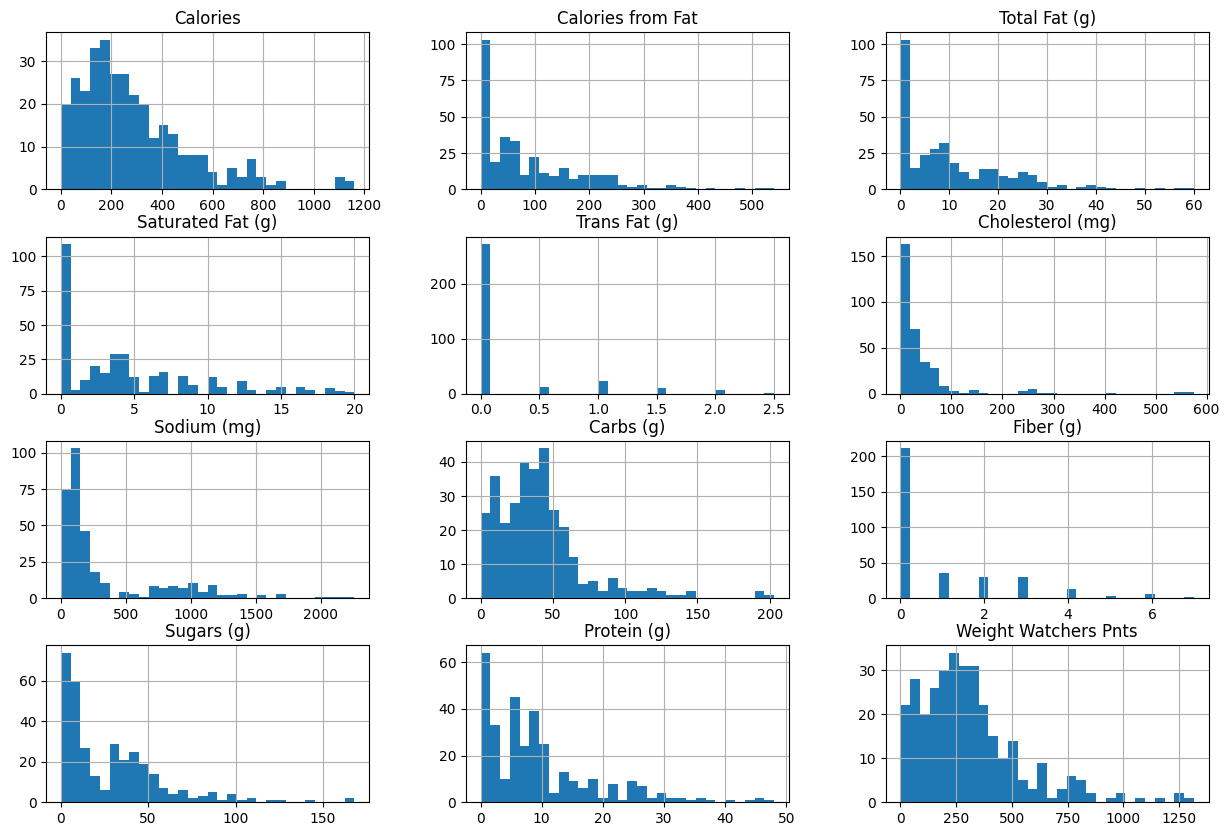

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

<Axes: >

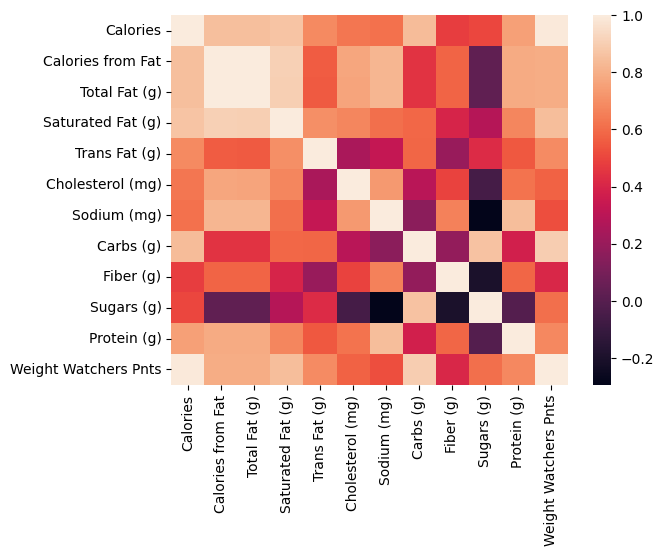

In [13]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr)

In [14]:
corr["Calories"].sort_values(ascending=False)

Calories                1.000000
Weight Watchers Pnts    0.992416
Saturated Fat (g)       0.864860
Calories from Fat       0.848630
Total Fat (g)           0.848445
Carbs (g)               0.839376
Protein (g)             0.748029
Trans Fat (g)           0.681767
Cholesterol (mg)        0.627204
Sodium (mg)             0.615202
Sugars (g)              0.502095
Fiber (g)               0.475933
Name: Calories, dtype: float64

In [15]:
df["Category"] = "Other"

df.loc[0:15, "Category"] = "Burgers"
df.loc[15:22, "Category"] = "Sandwiches"
df.loc[22:34, "Category"] = "Wraps"
df.loc[34:36, "Category"] = "Fries"
df.loc[39:42, "Category"] = "McNuggets"
df.loc[46:48, "Category"] = "Chicken Strips"
df.loc[52:62, "Category"] = "Salads"
df.loc[70:104, "Category"] = "Breakfast"
df.loc[105:131, "Category"] = "Desserts"
df.loc[131:145, "Category"] = "Milkshakes"
df.loc[149:175, "Category"] = "Soft Drinks"
df.loc[182:324, "Category"] = "Coffees, Teas and Hot Chocolate"
df.loc[325:330, "Category"] = "Smoothies"

In [16]:
df["Category"].value_counts()

Category
Coffees, Teas and Hot Chocolate    143
Breakfast                           35
Soft Drinks                         27
Desserts                            26
Other                               24
Burgers                             15
Milkshakes                          15
Wraps                               12
Salads                              11
Sandwiches                           7
McNuggets                            4
Fries                                3
Chicken Strips                       3
Smoothies                            3
Name: count, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=["Category"])
df.head()

,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),...,Category_Desserts,Category_Fries,Category_McNuggets,Category_Milkshakes,Category_Other,Category_Salads,Category_Sandwiches,Category_Smoothies,Category_Soft Drinks,Category_Wraps
0,Hamburger,250,80.0,9.0,3.5,0.5,25,520,31,2,...,False,False,False,False,False,False,False,False,False,False
1,Cheeseburger,300,110.0,12.0,6.0,0.5,40,750,33,2,...,False,False,False,False,False,False,False,False,False,False
2,Double Cheeseburger,440,210.0,23.0,11.0,1.5,80,1150,34,2,...,False,False,False,False,False,False,False,False,False,False
3,McDouble,390,170.0,19.0,8.0,1.0,65,920,33,2,...,False,False,False,False,False,False,False,False,False,False
4,Quarter Pounder® with Cheese,510,230.0,26.0,12.0,1.5,90,1190,40,3,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df = df.fillna(0)
df.isna().sum()


Item                                        0
Calories                                    0
Calories from Fat                           0
Total Fat (g)                               0
Saturated Fat (g)                           0
Trans Fat (g)                               0
Cholesterol (mg)                            0
Sodium (mg)                                 0
Carbs (g)                                   0
Fiber (g)                                   0
Sugars (g)                                  0
Protein (g)                                 0
Weight Watchers Pnts                        0
Category_Breakfast                          0
Category_Burgers                            0
Category_Chicken Strips                     0
Category_Coffees, Teas and Hot Chocolate    0
Category_Desserts                           0
Category_Fries                              0
Category_McNuggets                          0
Category_Milkshakes                         0
Category_Other                    